<a href="https://colab.research.google.com/github/grace3999/PPs/blob/master/colab_Kaggle_GOSSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#install packages
!pip install missingno
!pip install category-encoders

     |████████████████████████████████| 102kB 2.4MB/s 


In [0]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import scipy as sp
import missingno as msno
import pickle

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

#machine learning
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC 
#import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, classification_report

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [0]:
#data paths
train_data_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/training_v2.csv'
unlabeled_data_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/unlabeled.csv'

In [5]:
data = pd.read_csv(train_data_path)
data = pd.DataFrame(data = data)

print('Original data shape:\n', data.shape, '\n')
print('Group value counts:\n', data['hospital_death'].value_counts(), '\n')

data.head()

Original data shape:
 (91713, 186) 

Group value counts:
 0    83798
1     7915
Name: hospital_death, dtype: int64 



,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [0]:
#organize param names

data_meta = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id']

param_cat = ['ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem']

param_baics_apache = ['hospital_death', 'age', 'bmi', 'height', 'weight', 'pre_icu_los_days',
                      'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache',  'map_apache',
       'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache',
       'resprate_apache', 'sodium_apache', 'temp_apache',
       'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'elective_surgery', 'readmission_status', 'arf_apache', 'apache_post_operative', 'intubated_apache',
        'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']
 
param_vitals = ['hospital_death', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max',
       'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
       'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min']
       
param_labs = ['hospital_death', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',
       'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min',
       'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min',
       'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max',
       'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max',
       'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max',
       'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min',
       'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max',
       'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min']

param_labs_blood = ['hospital_death', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max',
       'd1_arterial_po2_min', 'd1_pao2fio2ratio_max',
       'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max',
       'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
       'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']

### Feature selection for continuous variables - remove autocorr




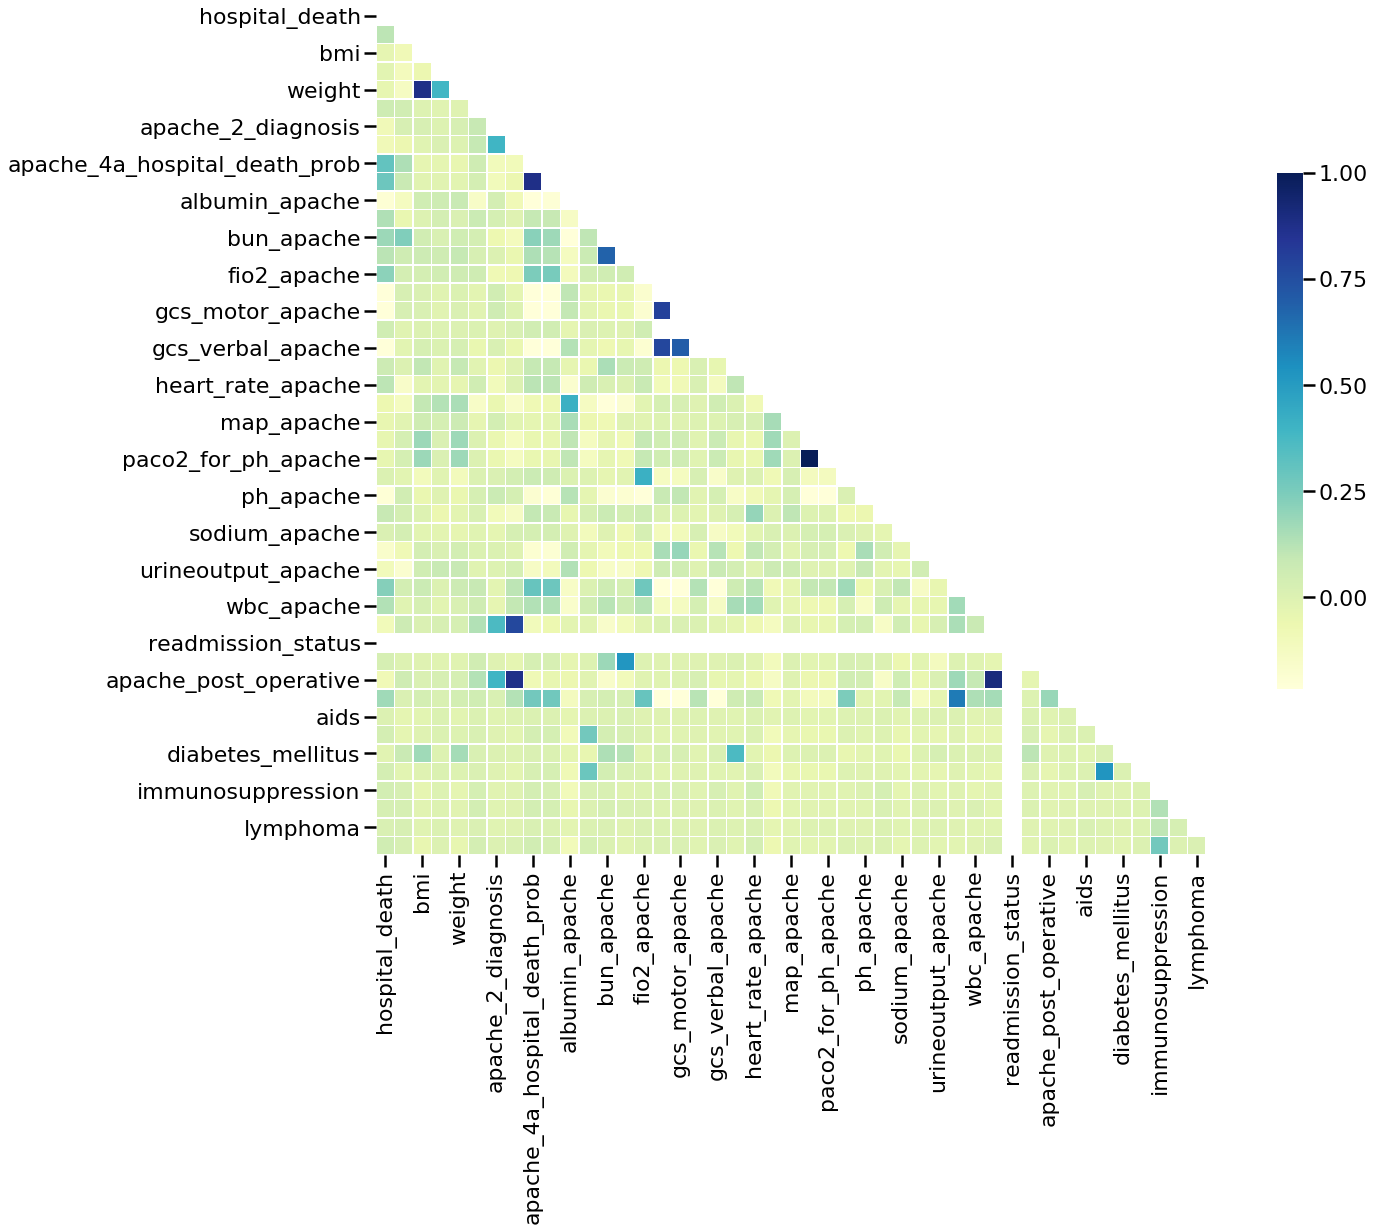

In [8]:
#explore autocorrelation across data set
corr = data[param_baics_apache].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19,19))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
#remove non-invasive and invasive (highly corr with regular measure), only use d1 (not h1 - lots of missing and corr with d1)
features_comb = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem', 
                 'age', 'bmi', 
                 'apache_4a_icu_death_prob',
                 'fio2_apache',
                 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 
                 'urineoutput_apache', 'ventilated_apache', 'elective_surgery', 'intubated_apache',
                 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 
                 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis',
                 'd1_diasbp_max', 'd1_diasbp_min', 
                   'd1_heartrate_max', 'd1_heartrate_min', 
                   'd1_mbp_max', 'd1_mbp_min', 
                   'd1_resprate_max', 'd1_resprate_min',
                   'd1_spo2_max', 'd1_spo2_min', 
                   'd1_sysbp_max', 'd1_sysbp_min',
                   'd1_temp_max', 'd1_temp_min',
                 'd1_albumin_max', 'd1_albumin_min', 
              'd1_bilirubin_max', 'd1_bilirubin_min', 
              'd1_bun_max', 'd1_bun_min', 
              'd1_calcium_max', 'd1_calcium_min', 
              'd1_creatinine_max', 'd1_creatinine_min',
              'd1_glucose_max', 'd1_glucose_min', 
              'd1_hco3_max', 'd1_hco3_min',
              'd1_hemaglobin_max', 'd1_hemaglobin_min', 
              'd1_hematocrit_max', 'd1_hematocrit_min', 
              'd1_inr_max', 'd1_inr_min', 
              'd1_lactate_max', 'd1_lactate_min', 
              'd1_platelets_max', 'd1_platelets_min',
              'd1_potassium_max', 'd1_potassium_min', 
              'd1_sodium_max', 'd1_sodium_min', 
              'd1_wbc_max', 'd1_wbc_min',
                    'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']

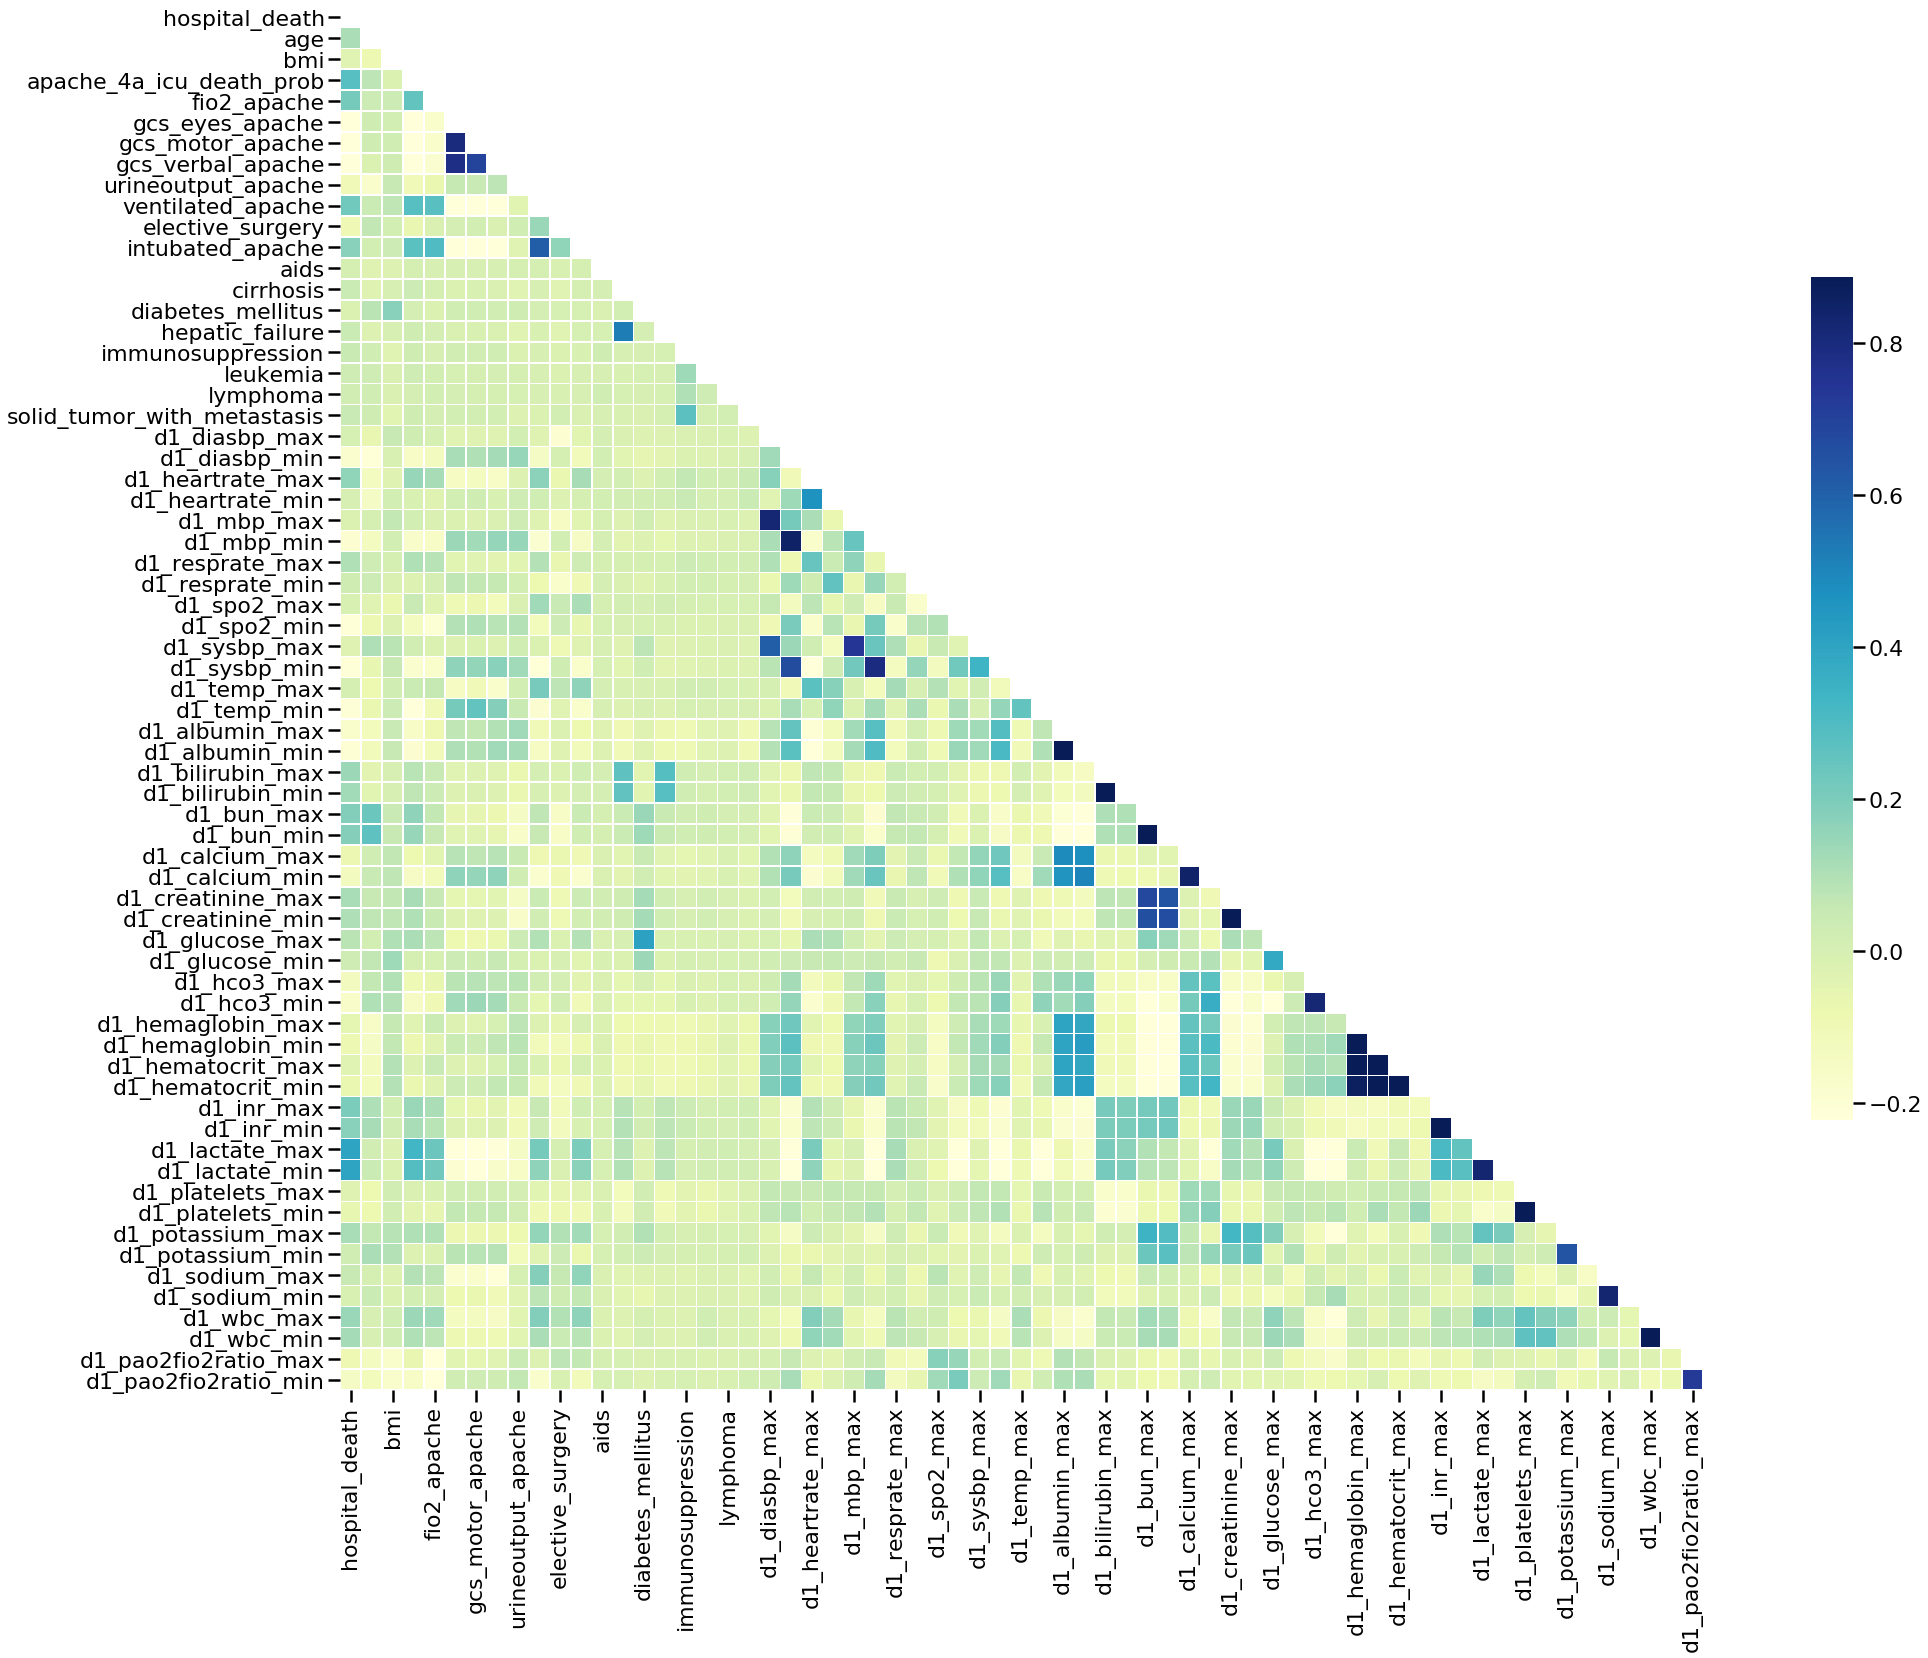

In [10]:
#explore autocorrelation across data set
corr = data[features_comb].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(31,31))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Categorical viz and encoding - cat variables are important in health so want to encode using model instead of one-hot etc.


ethnicity


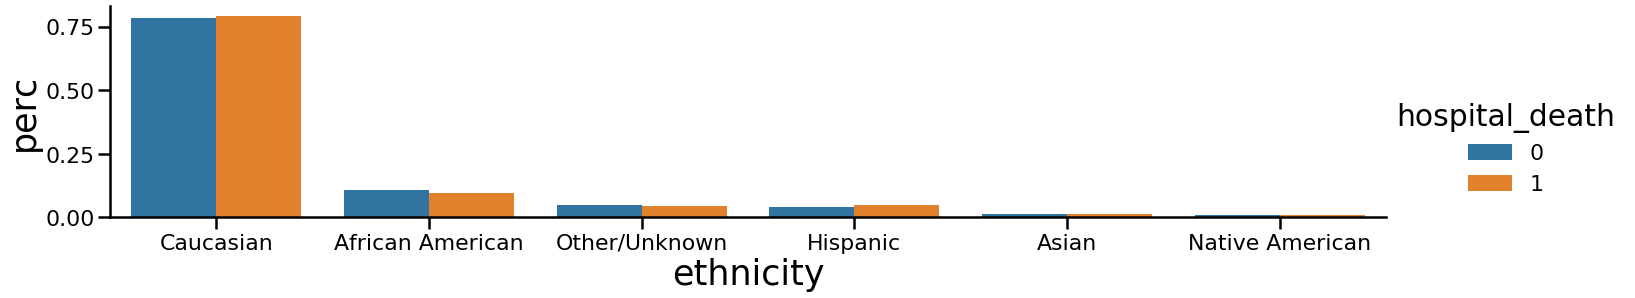



gender


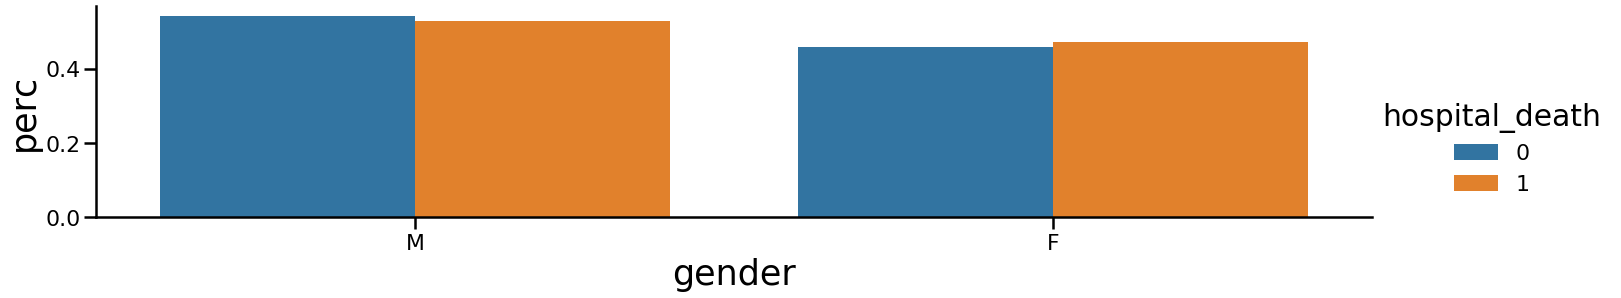



icu_admit_source


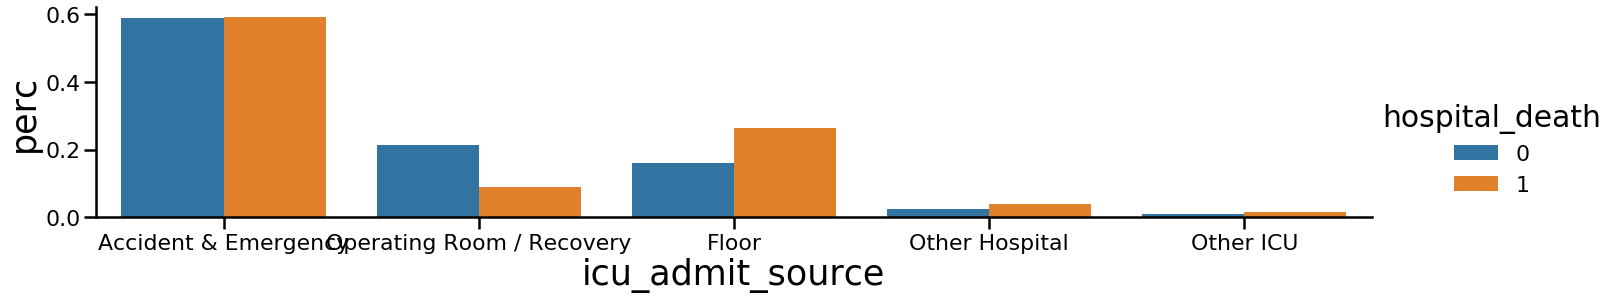



hospital_admit_source


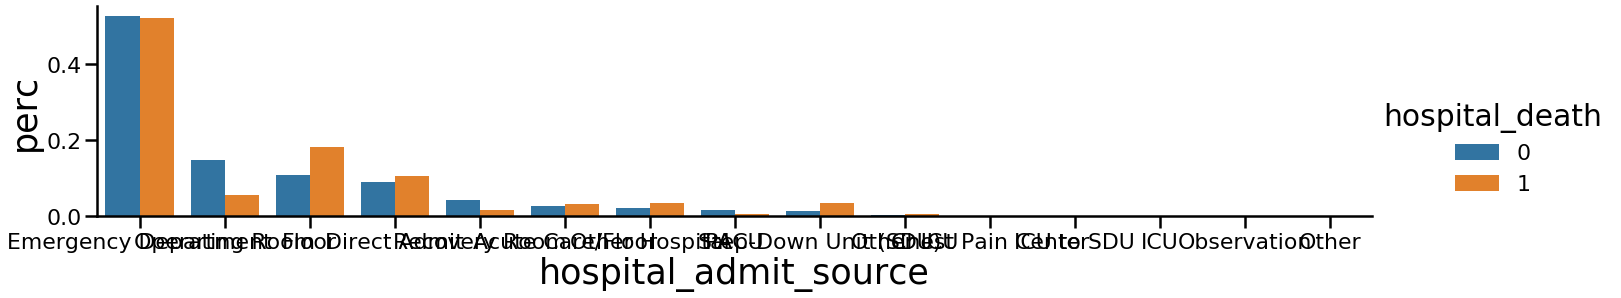



icu_stay_type


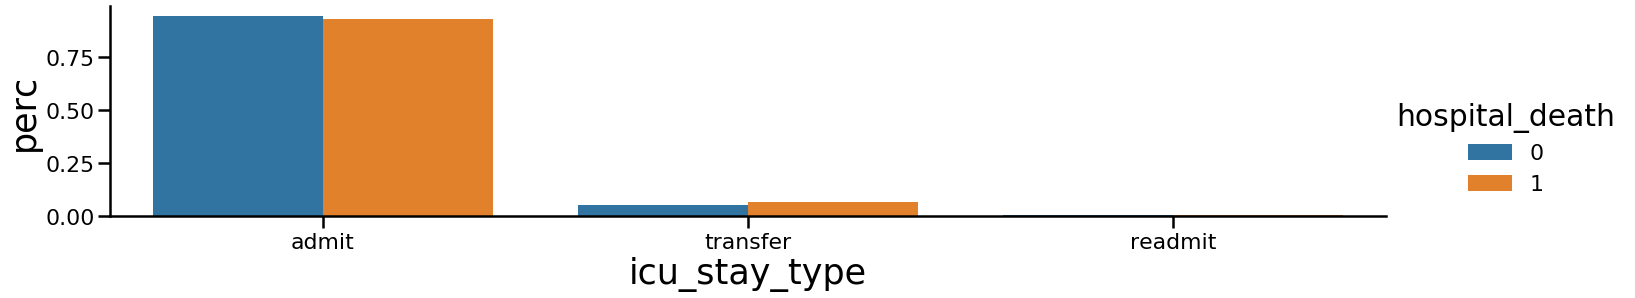



icu_type


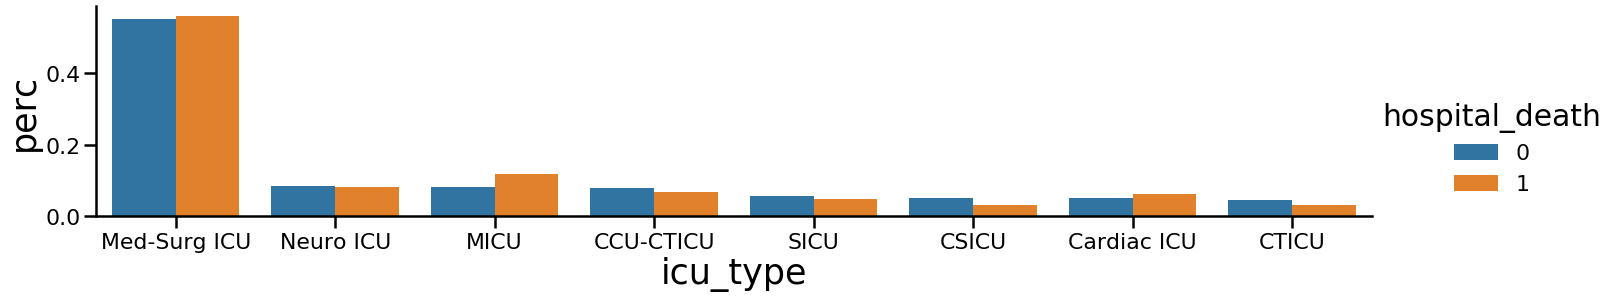



apache_3j_bodysystem


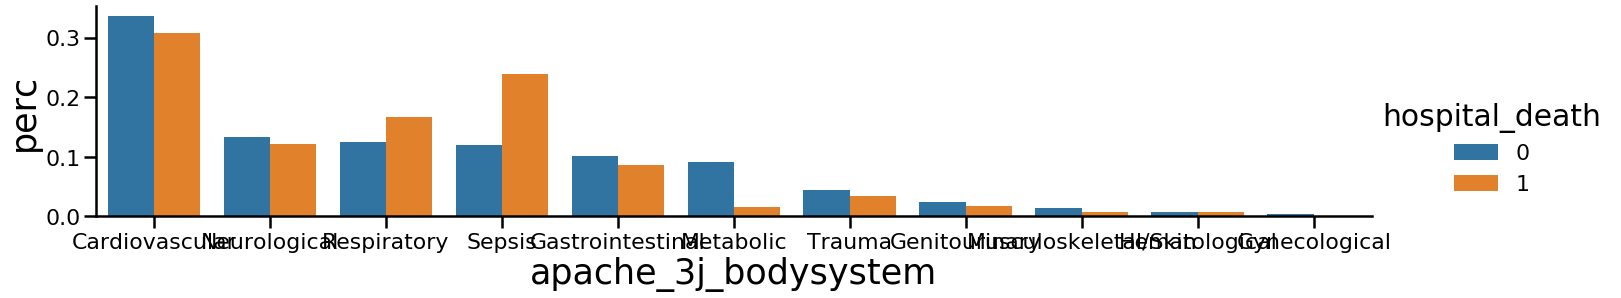



apache_2_bodysystem


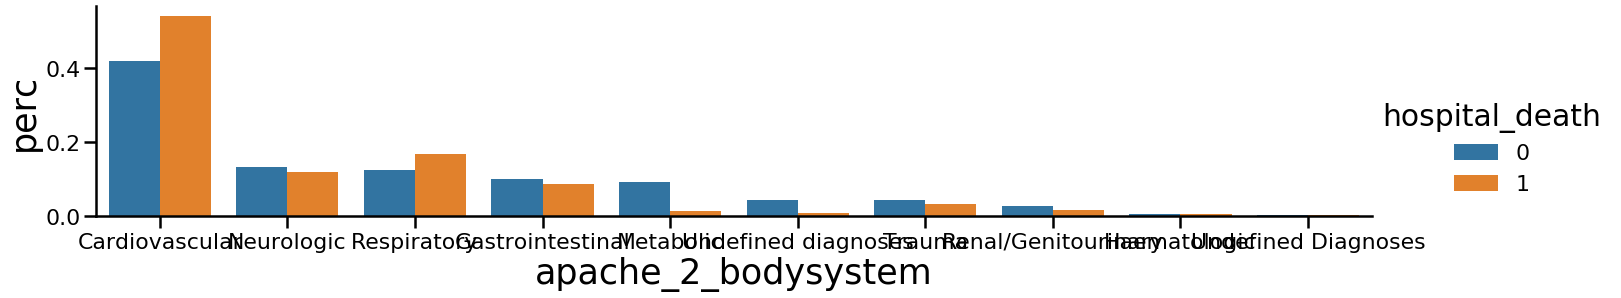

In [11]:
for param in data[param_cat]:
    print(param)

    data_int = (data.groupby('hospital_death')[param].value_counts() /
                        data.groupby('hospital_death')[param].count()).reset_index(name='perc')
        
    try:
        g = sns.catplot(x=param, y='perc', kind='bar', data=data_int, hue='hospital_death', ci=68, height=5, aspect=4)
        plt.show()
        
        print('\n')
        
    except:
        pass

In [0]:
#encode categorical variables using m_estimate
data_cat_train = data[features_comb]

Y_train = data_cat_train['hospital_death']
X_train = data_cat_train[features_comb]


# use target encoding to encode two categorical features
enc = ce.TargetEncoder(cols=param_cat).fit(X_train, Y_train)
cat_enc_data = enc.transform(X_train, Y_train)

#pickel model to save for later use with test set
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

pkl_filename = str(save_path + "cat_encode_model.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(enc, file)

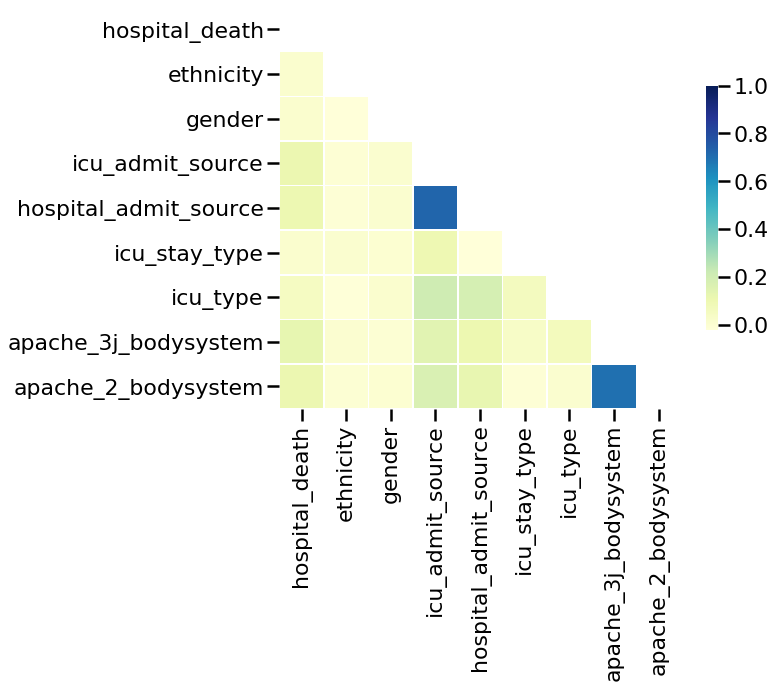

In [13]:
#explore autocorrelation across categorical variables after encoding
param_cat = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source', 'icu_stay_type', 'icu_type', 
       'apache_3j_bodysystem', 'apache_2_bodysystem']


corr = cat_enc_data[param_cat].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
#remove non-invasive and invasive (highly autocorr with regular measure), only use d1 (not h1 - lots of missing and autocorr with d1), remove cat variables that are highly autocorr
features_comb = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 
                 'age', 'bmi', 'apache_4a_icu_death_prob', 'fio2_apache',
                 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 
                 'urineoutput_apache', 'ventilated_apache', 'elective_surgery', 'intubated_apache',
                 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 
                 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis',
                 'd1_diasbp_max', 'd1_diasbp_min', 
                   'd1_heartrate_max', 'd1_heartrate_min', 
                   'd1_mbp_max', 'd1_mbp_min', 
                   'd1_resprate_max', 'd1_resprate_min',
                   'd1_spo2_max', 'd1_spo2_min', 
                   'd1_sysbp_max', 'd1_sysbp_min',
                   'd1_temp_max', 'd1_temp_min',
                 'd1_albumin_max', 'd1_albumin_min', 
              'd1_bilirubin_max', 'd1_bilirubin_min', 
              'd1_bun_max', 'd1_bun_min', 
              'd1_calcium_max', 'd1_calcium_min', 
              'd1_creatinine_max', 'd1_creatinine_min',
              'd1_glucose_max', 'd1_glucose_min', 
              'd1_hco3_max', 'd1_hco3_min',
              'd1_hemaglobin_max', 'd1_hemaglobin_min', 
              'd1_hematocrit_max', 'd1_hematocrit_min', 
              'd1_inr_max', 'd1_inr_min', 
              'd1_lactate_max', 'd1_lactate_min', 
              'd1_platelets_max', 'd1_platelets_min',
              'd1_potassium_max', 'd1_potassium_min', 
              'd1_sodium_max', 'd1_sodium_min', 
              'd1_wbc_max', 'd1_wbc_min',
                    'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']

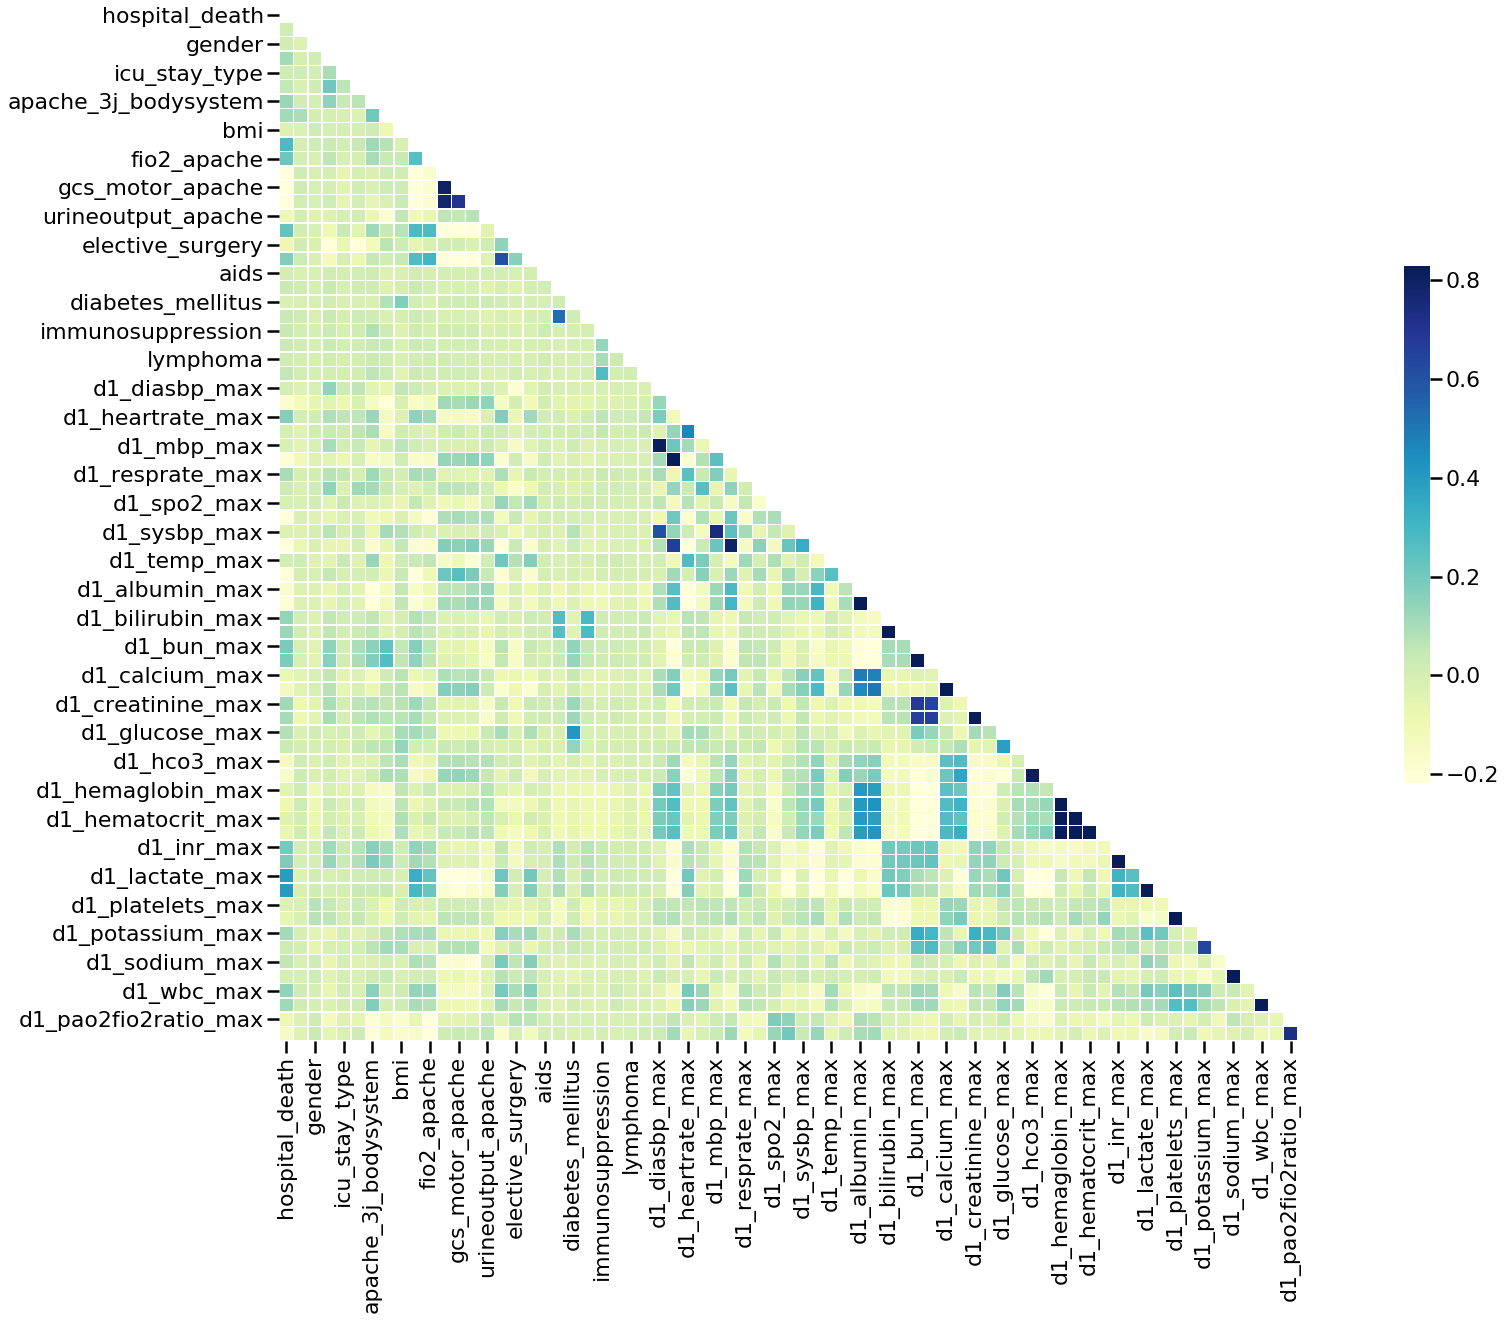

In [15]:
#explore autocorrelation across data set
corr = cat_enc_data[features_comb].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(33, 19))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Impute missing data


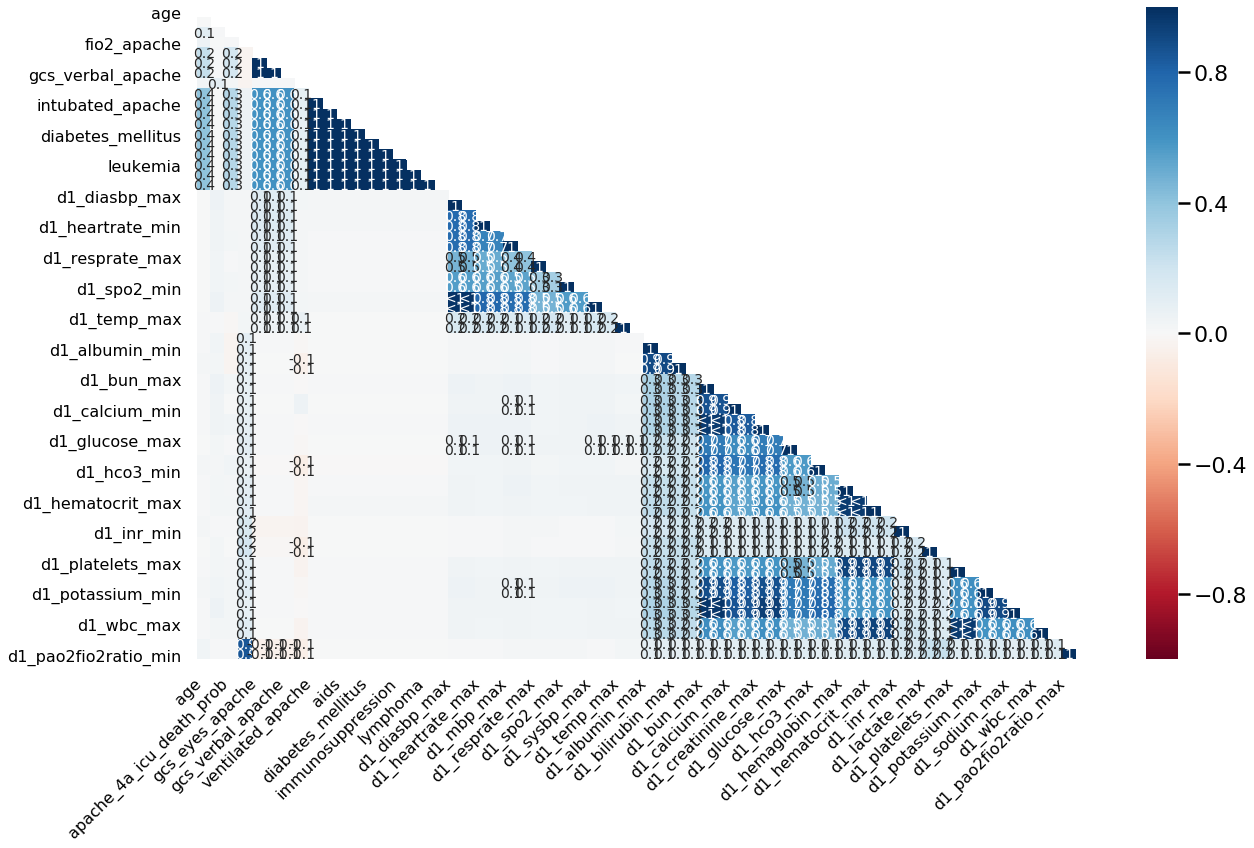

In [16]:
#use missingo to viz missing data
msno.heatmap(cat_enc_data[features_comb])

In [17]:
cat_enc_data = cat_enc_data[features_comb]
cat_enc_data.isna().sum()

hospital_death                     0
ethnicity                          0
gender                             0
icu_admit_source                   0
icu_stay_type                      0
icu_type                           0
apache_3j_bodysystem               0
age                             4228
bmi                             3429
apache_4a_icu_death_prob        7947
fio2_apache                    70868
gcs_eyes_apache                 1901
gcs_motor_apache                1901
gcs_verbal_apache               1901
urineoutput_apache             48998
ventilated_apache                715
elective_surgery                   0
intubated_apache                 715
aids                             715
cirrhosis                        715
diabetes_mellitus                715
hepatic_failure                  715
immunosuppression                715
leukemia                         715
lymphoma                         715
solid_tumor_with_metastasis      715
d1_diasbp_max                    165
d

In [0]:
#impute missing data for features

imp = IterativeImputer(max_iter=99, random_state=39, verbose=2).fit(cat_enc_data)
cat_enc_data_imp = imp.transform(cat_enc_data)

#create final data set
final_data = pd.DataFrame(data=cat_enc_data_imp, columns=cat_enc_data.columns.values)

#pickel model to save for later use with test set
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

pkl_filename = str(save_path + "impute_model.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(enc, file)

[IterativeImputer] Completing matrix with shape (91713, 72)
[IterativeImputer] Ending imputation round 1/99, elapsed time 45.04
[IterativeImputer] Change: 3525.5373595430756, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 2/99, elapsed time 90.56
[IterativeImputer] Change: 2673.5291449391284, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 3/99, elapsed time 135.75
[IterativeImputer] Change: 12447.397829142963, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 4/99, elapsed time 180.82
[IterativeImputer] Change: 8229.931575069535, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 5/99, elapsed time 225.28
[IterativeImputer] Change: 6934.741335133873, scaled tolerance: 8.716669631999999 
[IterativeImputer] Ending imputation round 6/99, elapsed time 269.59
[IterativeImputer] Change: 2544.7454952137414, scaled tolerance: 8.716669631999999 


In [0]:
final_data.to_csv('final_data.csv')

In [0]:
features = ['hospital_death', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 
                 'age', 'bmi', 'apache_4a_icu_death_prob', 'fio2_apache',
                 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 
                 'urineoutput_apache', 'ventilated_apache', 'elective_surgery', 'intubated_apache',
                 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 
                 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis',
                 'd1_diasbp_max', 'd1_diasbp_min', 
                   'd1_heartrate_max', 'd1_heartrate_min', 
                   'd1_mbp_max', 'd1_mbp_min', 
                   'd1_resprate_max', 'd1_resprate_min',
                   'd1_spo2_max', 'd1_spo2_min', 
                   'd1_sysbp_max', 'd1_sysbp_min',
                   'd1_temp_max', 'd1_temp_min',
                 'd1_albumin_max', 'd1_albumin_min', 
              'd1_bilirubin_max', 'd1_bilirubin_min', 
              'd1_bun_max', 'd1_bun_min', 
              'd1_calcium_max', 'd1_calcium_min', 
              'd1_creatinine_max', 'd1_creatinine_min',
              'd1_glucose_max', 'd1_glucose_min', 
              'd1_hco3_max', 'd1_hco3_min',
              'd1_hemaglobin_max', 'd1_hemaglobin_min', 
              'd1_hematocrit_max', 'd1_hematocrit_min', 
              'd1_inr_max', 'd1_inr_min', 
              'd1_lactate_max', 'd1_lactate_min', 
              'd1_platelets_max', 'd1_platelets_min',
              'd1_potassium_max', 'd1_potassium_min', 
              'd1_sodium_max', 'd1_sodium_min', 
              'd1_wbc_max', 'd1_wbc_min',
                    'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']

#split data
train, test = train_test_split(final_data, test_size = .3, random_state=1, stratify = final_data['hospital_death'])

Y_train = train['hospital_death']
Y_test = test['hospital_death']


X_train = train[features]
X_test = test[features]


In [0]:
#scale data algo
scaler = StandardScaler()

#k fold algo
strat_k_fold = StratifiedKFold(n_splits=10)

#classifier algos
dm_cv = DummyClassifier(strategy='stratified', random_state=39)
lr_cv = LogisticRegression(random_state=39, class_weight='balanced')
rf_cv = RandomForestClassifier(random_state=39, class_weight='balanced')
knn_cv = KNeighborsClassifier()
ab_cv = AdaBoostClassifier(random_state=39)
gb_cv = GradientBoostingClassifier(random_state=39)
svm_cv = SVC(kernel='linear', probability=False, class_weight='balanced') 

#dic with classifier and feature importance attribute name
models_dic = {'dm_cv': (dm_cv, 'none'), 
              'lr_cv': (lr_cv, 'coef'), 
              'rf_cv': (rf_cv, 'feature_importance'), 
              'knn_cv': (knn_cv, 'none'),  
              'ab_cv': (ab_cv, 'feature_importance'),
              'gb_cv': (gb_cv, 'feature_importance'),
              'svm_cv':(svm_cv, 'coef')}



In [0]:
def classification_pipeline(X, y, cv_instance, model_instance, feature_names, fi_name):
    
    #scale data
    data_scaled = scaler.fit_transform(X)
    
    #generate cross-val sets
    cv = list(cv_instance.split(data_scaled, y))
    
    #predict class and predict probability 
    y_pred = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict')
    y_pred_prob = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict_proba')
    
    #generate confusion matrix
    conf_mat = confusion_matrix(y, y_pred)
    print('Confusion matrix:', conf_mat)
    
    #generate ROC_AUC
    ROC_AUC = metrics.roc_auc_score(y, y_pred_prob[:,1])
    print("ROC_AUC: ", ROC_AUC)
    
    # generate additional metrics
    recall = metrics.recall_score(y,y_pred)
    precision = metrics.precision_score(y,y_pred)
    accuracy = metrics.accuracy_score(y,y_pred)
    F1 = metrics.f1_score(y,y_pred)
    print("Sensitivity/Recall (TPR): ",recall)
    print("Precision (PPV): ", precision)
    print("Accuracy: ", accuracy)
    print("F1:", F1)
    
    #determine feature importance
    feature_dic = feature_importance(data_scaled, y, model_instance, feature_names, fi_name)
    
    #create dic
    data_dic = {}
    data_dic['y_pred'] = y_pred
    data_dic['y_pred_prob'] = y_pred_prob
    data_dic['conf_mat'] = conf_mat
    data_dic['ROC_AUC'] = ROC_AUC
    data_dic['recall'] = recall
    data_dic['precision'] = precision
    data_dic['accuracy'] = accuracy
    data_dic['F1'] = F1
    
    data_dic = {**data_dic, **feature_dic}
    
    return data_dic

In [0]:
feature_set = 'full'
feature_names = features

data_full_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_full_features[name + '_' + feature_set] = classification_pipeline(X_train, Y_train, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

In [0]:
#put dics in pandas df 
final_dic = {**data_full_features}
data_pandas = pd.DataFrame.from_dict(data = final_dic, orient='index')
data_pandas.sort_values('precision', ascending=False).head()

In [0]:
fpr_dm, tpr_dm, thresholds_dm = metrics.roc_curve(Y_train_class, data_full_features['dm_cv_ave']['y_pred_prob'][:,1])
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(Y_train_class, data_full_features['lr_cv_ave']['y_pred_prob'][:,1])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(Y_train_class, data_full_features['rf_cv_ave']['y_pred_prob'][:,1])
fpr_gb, tpr_gb, thresholds_gb = metrics.roc_curve(Y_train_class, data_full_features['gb_cv_ave']['y_pred_prob'][:,1])
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(Y_train_class, data_full_features['svm_cv_ave']['y_pred_prob'][:,1])
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(Y_train_class, data_full_features['knn_cv_ave']['y_pred_prob'][:,1])
fpr_ab, tpr_ab, thresholds_ab = metrics.roc_curve(Y_train_class, data_full_features['ab_cv_ave']['y_pred_prob'][:,1])

# plot model ROC curves
plt.plot(fpr_dm, tpr_dm, label="dm")
plt.plot(fpr_lr, tpr_lr, label="lr")
plt.plot(fpr_rf, tpr_rf, label="rf")
plt.plot(fpr_gb, tpr_gb, label="gb")
plt.plot(fpr_svm, tpr_svm, label="svm")
plt.plot(fpr_knn, tpr_knn, label="knn")
plt.plot(fpr_ab, tpr_ab, label="ada")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)

In [0]:
# calculate precision-recall curve
precision_dm, recall_dm, thresholds_pr_dm = metrics.precision_recall_curve(Y_train_class, data_full_features['dm_cv_ave']['y_pred_prob'][:,1])
precision_lr, recall_lr, thresholds_pr_lr = metrics.precision_recall_curve(Y_train_class, data_full_features['lr_cv_ave']['y_pred_prob'][:,1])
precision_rf, recall_rf, thresholds_pr_rf = metrics.precision_recall_curve(Y_train_class, data_full_features['rf_cv_ave']['y_pred_prob'][:,1])
precision_gb, recall_gb, thresholds_pr_gb = metrics.precision_recall_curve(Y_train_class, data_full_features['gb_cv_ave']['y_pred_prob'][:,1])
precision_svm, recall_svm, thresholds_pr_svm = metrics.precision_recall_curve(Y_train_class, data_full_features['svm_cv_ave']['y_pred_prob'][:,1])
precision_knn, recall_knn, thresholds_pr_knn = metrics.precision_recall_curve(Y_train_class, data_full_features['knn_cv_ave']['y_pred_prob'][:,1])
precision_ab, recall_ab, thresholds_pr_ab = metrics.precision_recall_curve(Y_train_class, data_full_features['ab_cv_ave']['y_pred_prob'][:,1])

plt.plot(recall_dm, precision_dm, label='dm')
plt.plot(recall_lr, precision_lr, label='lr')
plt.plot(recall_rf, precision_rf, label='rf')
plt.plot(recall_gb, precision_gb, label='gb')
plt.plot(recall_svm, precision_svm, label='svm')
plt.plot(recall_knn, precision_knn, label='knn')
plt.plot(recall_ab, precision_ab, label='ada')

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('Recall (Sensitivity)', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)

In [0]:
#pickel model to save for later use with test set
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

pkl_filename = str(save_path + "classification_model.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(enc, file)